In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, average_precision_score, confusion_matrix,
    roc_curve, precision_recall_curve, auc, classification_report
)
print("✓ All libraries imported successfully")

✓ All libraries imported successfully


In [2]:
# Load the dataset
train_df = pd.read_csv('C:\\Users\\fabrizio natali\\Desktop\\dissertation\\train_data.csv')

In [3]:
df = pd.read_csv('C:\\Users\\fabrizio natali\\Desktop\\dissertation\\train_data.csv')
display(df.head())

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# Calculate the percentage of missing values in each column
missing_percentage = df.isnull().sum() / len(df) * 100

# Get the columns with more than 20% missing data
columns_to_drop = missing_percentage[missing_percentage > 20].index

# Drop the columns from the DataFrame
df_cleaned = df.drop(columns=columns_to_drop)
display(df_cleaned.head())

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
def read_data(file_name):
  df = pd.read_csv(file_name)  # Use the file_name parameter
  print(file_name, 'has', len(df), 'data points')
  return df

In [6]:
# If you want to see the number of data points, call the function like this:
train_df_read = read_data('C:\\Users\\fabrizio natali\\Desktop\\dissertation\\train_data.csv')

C:\Users\fabrizio natali\Desktop\dissertation\train_data.csv has 307511 data points


In [7]:
# Identify non-numeric columns
non_numeric_cols = df_cleaned.select_dtypes(exclude=np.number).columns
print("Non-numeric columns found:", non_numeric_cols)

Non-numeric columns found: Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'WEEKDAY_APPR_PROCESS_START',
       'ORGANIZATION_TYPE'],
      dtype='object')


In [8]:
# Apply one-hot encoding to convert non-numeric columns to numeric
df_encoded = pd.get_dummies(df_cleaned, columns=non_numeric_cols)
display(df_encoded.head())

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,...,False,False,False,False,False,False,False,False,False,False
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,...,False,False,False,False,False,False,False,False,False,False
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,...,False,False,False,False,False,False,False,False,False,False
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,...,False,False,False,False,False,False,False,False,False,False
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,...,False,False,False,False,False,False,False,False,False,False


In [9]:
# Verify that all columns are now numeric (except potentially the target variable if it was non-numeric initially)
print("Data types after encoding:")
display(df_encoded.dtypes)

Data types after encoding:


SK_ID_CURR                               int64
TARGET                                   int64
CNT_CHILDREN                             int64
AMT_INCOME_TOTAL                       float64
AMT_CREDIT                             float64
                                        ...   
ORGANIZATION_TYPE_Transport: type 2       bool
ORGANIZATION_TYPE_Transport: type 3       bool
ORGANIZATION_TYPE_Transport: type 4       bool
ORGANIZATION_TYPE_University              bool
ORGANIZATION_TYPE_XNA                     bool
Length: 167, dtype: object

In [10]:
# Use TARGET column as target variable and the rest as features (after encoding & cleaning)
# IMPORTANT: Use df_encoded (numeric only) to avoid string-to-float errors in scaling.
if 'df_encoded' not in globals():
    raise NameError("df_encoded not found. Run the encoding cell first.")

X = df_encoded.drop('TARGET', axis=1)
y = df_encoded['TARGET']

print("Dataset (encoded) loaded successfully!")
print(f"Encoded dataset shape: {df_encoded.shape}")
print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print("Target value counts:")
print(y.value_counts())

# Quick sanity check: ensure all feature columns are numeric
dtypes_non_numeric = X.dtypes[~X.dtypes.apply(lambda dt: np.issubdtype(dt, np.number))]
if len(dtypes_non_numeric) > 0:
    print("⚠ Warning: Non-numeric columns detected after encoding:")
    print(dtypes_non_numeric)
else:
    print("✓ All feature columns are numeric after encoding.")

# Display first few rows
display(X.head())

Dataset (encoded) loaded successfully!
Encoded dataset shape: (307511, 167)
Features shape: (307511, 166)
Target shape: (307511,)
Target value counts:
TARGET
0    282686
1     24825
Name: count, dtype: int64
⚠ Warning: Non-numeric columns detected after encoding:
NAME_CONTRACT_TYPE_Cash loans          bool
NAME_CONTRACT_TYPE_Revolving loans     bool
CODE_GENDER_F                          bool
CODE_GENDER_M                          bool
CODE_GENDER_XNA                        bool
                                       ... 
ORGANIZATION_TYPE_Transport: type 2    bool
ORGANIZATION_TYPE_Transport: type 3    bool
ORGANIZATION_TYPE_Transport: type 4    bool
ORGANIZATION_TYPE_University           bool
ORGANIZATION_TYPE_XNA                  bool
Length: 106, dtype: object


,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA
0,100002,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,-3648.0,...,False,False,False,False,False,False,False,False,False,False
1,100003,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,-1186.0,...,False,False,False,False,False,False,False,False,False,False
2,100004,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,-4260.0,...,False,False,False,False,False,False,False,False,False,False
3,100006,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,-9833.0,...,False,False,False,False,False,False,False,False,False,False
4,100007,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,-4311.0,...,False,False,False,False,False,False,False,False,False,False


In [11]:
# Feature Scaling (Critical for Neural Networks)
# Ensure all features are numeric (defensive check in case X was created before one-hot encoding).
# Avoid re-importing SimpleImputer (import already done in an earlier cell).

# Ensure X is a DataFrame
if not isinstance(X, pd.DataFrame):
    X = pd.DataFrame(X)

# Detect any non-numeric columns that may still be present (e.g., if this cell was run before encoding cell)
categorical_cols = X.select_dtypes(exclude=[np.number, bool]).columns
if len(categorical_cols) > 0:
    print(f"Detected {len(categorical_cols)} non-numeric columns. Applying one-hot encoding...")
    X = pd.get_dummies(X, columns=categorical_cols, drop_first=False)
    print(f"✓ One-hot encoding complete. New shape: {X.shape}")
else:
    print("✓ All features already numeric.")

# Impute remaining NaNs in numeric matrix (mean strategy now safe)
imputer_nn = SimpleImputer(strategy='mean')
X_imputed_array = imputer_nn.fit_transform(X)
X_imputed = pd.DataFrame(X_imputed_array, columns=X.columns, index=X.index)

# Confirm no NaNs remain
if np.isnan(X_imputed.values).any():
    raise ValueError("NaNs remain after imputation. Check preprocessing pipeline.")
else:
    print("✓ No NaNs remain after imputation.")

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

print("✓ Features imputed and scaled using StandardScaler")
print(f"Scaled features shape: {X_scaled.shape}")
print(f"Mean (first 5 features): {np.mean(X_scaled, axis=0)[:5]} ...")
print(f"Std  (first 5 features): {np.std(X_scaled, axis=0)[:5]} ...")

✓ All features already numeric.
✓ No NaNs remain after imputation.
✓ Features imputed and scaled using StandardScaler
Scaled features shape: (307511, 166)
Mean (first 5 features): [-5.91520109e-18 -3.20714809e-17 -1.59086561e-17 -4.07478794e-17
  4.74140338e-17] ...
Std  (first 5 features): [1. 1. 1. 1. 1.] ...


In [12]:
# Train/Test Split
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print(f"✓ Data split completed")
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Validation set size: {X_val.shape[0]} samples")
print(f"Number of features: {X_train.shape[1]}")
print(f"Number of classes: {len(np.unique(y))}")

✓ Data split completed
Training set size: 246008 samples
Validation set size: 61503 samples
Number of features: 166
Number of classes: 2


In [13]:
# Model Definition and Training
print("Training Neural Network Classifier...")

# Create and train the neural network model
model = MLPClassifier(
    hidden_layer_sizes=(32, 16), 
    max_iter=200, 
    random_state=42,
    activation='relu',
    solver='adam',
    learning_rate_init=0.001,
    alpha=0.0001
)

# Train the model
model.fit(X_train, y_train)

print(f"✓ Neural Network training completed")
print(f"Network architecture: {[X_train.shape[1]] + list(model.hidden_layer_sizes) + [len(model.classes_)]}")
print(f"Training iterations: {model.n_iter_} / {model.max_iter}")
print(f"Convergence: {'Achieved' if model.n_iter_ < model.max_iter else 'Not achieved'}")

Training Neural Network Classifier...
✓ Neural Network training completed
Network architecture: [166, 32, 16, 2]
Training iterations: 149 / 200
Convergence: Achieved


In [14]:
# Predictions and Metrics Calculation
print("Calculating predictions and metrics...")

# Make predictions
y_pred = model.predict(X_val)

# Handle probability predictions for both binary and multiclass
n_classes = len(np.unique(y))
print(f"Number of classes detected: {n_classes}")

if n_classes > 2:
    # For multiclass, we'll use predict_proba and handle it properly
    y_prob_all = model.predict_proba(X_val)
    # For ROC curves in multiclass, we'll use the probability matrix
    y_prob = np.max(y_prob_all, axis=1)  # Max probability for confidence measures
else:
    # For binary, use probability of positive class
    y_prob_all = model.predict_proba(X_val)
    y_prob = y_prob_all[:, 1]

# Calculate metrics
acc = accuracy_score(y_val, y_pred)

if n_classes > 2:
    # Multiclass metrics
    prec = precision_score(y_val, y_pred, average='weighted', zero_division=0)
    rec = recall_score(y_val, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_val, y_pred, average='weighted', zero_division=0)
    roc_auc = roc_auc_score(y_val, y_prob_all, multi_class='ovr', average='weighted')
    ap = average_precision_score(y_val, y_prob_all, average='weighted')
else:
    # Binary classification metrics
    prec = precision_score(y_val, y_pred, zero_division=0)
    rec = recall_score(y_val, y_pred, zero_division=0)
    f1 = f1_score(y_val, y_pred, zero_division=0)
    roc_auc = roc_auc_score(y_val, y_prob)
    ap = average_precision_score(y_val, y_prob)

cm = confusion_matrix(y_val, y_pred)

print(f"✓ Metrics calculated successfully")
print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")
print(f"Average Precision: {ap:.4f}")
print(f"Confusion Matrix shape: {cm.shape}")

Calculating predictions and metrics...
Number of classes detected: 2
✓ Metrics calculated successfully
Accuracy: 0.9156
Precision: 0.2914
Recall: 0.0337
F1 Score: 0.0605
ROC AUC: 0.7125
Average Precision: 0.1814
Confusion Matrix shape: (2, 2)


In [15]:
# Evaluate the model (fixed: use y_val instead of undefined y_test; use probabilities for ROC AUC & AP)
# Metrics already imported earlier; no need to re-import.

accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred, zero_division=0)
recall = recall_score(y_val, y_pred, zero_division=0)
f1 = f1_score(y_val, y_pred, zero_division=0)
# Use predicted probabilities (y_prob) for proper ROC AUC & Average Precision
roc_auc = roc_auc_score(y_val, y_prob)
average_precision = average_precision_score(y_val, y_prob)
confusion = confusion_matrix(y_val, y_pred)

print("Validation Set Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)
print("Average Precision Score:", average_precision)
print("Confusion Matrix:")
print(confusion)

Validation Set Accuracy: 0.915646391232948
Precision: 0.2914485165794066
Recall: 0.033744190745605175
F1 Score: 0.060485331401666065
ROC AUC Score: 0.7125333349416085
Average Precision Score: 0.1813668953913814
Confusion Matrix:
[[56148   406]
 [ 4782   167]]


In [16]:
from sklearn.inspection import permutation_importance
# np already imported earlier

# Separate features (X) and target (y) from the encoded dataset
X_real = df_encoded.drop('TARGET', axis=1)
y_real = df_encoded['TARGET']

# Impute missing values (mean strategy consistent with earlier preprocessing)
imputer_perm = SimpleImputer(strategy='mean')
X_real_imputed = pd.DataFrame(
    imputer_perm.fit_transform(X_real),
    columns=X_real.columns,
    index=X_real.index
)

# Train/validation split
X_train_real, X_test_real, y_train_real, y_test_real = train_test_split(
    X_real_imputed, y_real, test_size=0.2, random_state=42
)

# Scale features (fit on train only)
scaler_real = StandardScaler()
X_train_real_scaled = pd.DataFrame(
    scaler_real.fit_transform(X_train_real),
    columns=X_train_real.columns,
    index=X_train_real.index
)
X_test_real_scaled = pd.DataFrame(
    scaler_real.transform(X_test_real),
    columns=X_test_real.columns,
    index=X_test_real.index
)

# Keep original variable names for potential downstream use
X_train_real = X_train_real_scaled
X_test_real = X_test_real_scaled

class MLPWithPermutationImportance(MLPClassifier):
    def fit(self, X, y, **fit_params):
        super().fit(X, y, **fit_params)
        rng = np.random.RandomState(42)
        sample_size = min(5000, X.shape[0])
        sample_idx = rng.choice(X.shape[0], size=sample_size, replace=False)
        if hasattr(X, 'iloc'):
            X_sample = X.iloc[sample_idx]
        else:
            X_sample = X[sample_idx]
        if hasattr(y, 'iloc'):
            y_sample = y.iloc[sample_idx]
        else:
            y_sample = y[sample_idx]
        perm = permutation_importance(
            self, X_sample, y_sample,
            n_repeats=5, random_state=42, n_jobs=-1
        )
        self.feature_importances_ = perm.importances_mean
        return self

model_real = MLPWithPermutationImportance(
    hidden_layer_sizes=(32,16),
    activation='relu',
    solver='adam',
    learning_rate_init=0.001,
    alpha=0.0001,
    max_iter=200,
    random_state=42
)
model_real.fit(X_train_real, y_train_real)

# Create feature importances using the trained model
feature_importances = pd.Series(
    model_real.feature_importances_,
    index=X_train_real.columns
)

# Sort the importances in descending order and display the top 10
top_features = feature_importances.sort_values(ascending=False).head(10)
print("Top 10 most important features:")
print(top_features)

Top 10 most important features:
AMT_GOODS_PRICE                             0.01244
AMT_CREDIT                                  0.00920
EXT_SOURCE_2                                0.00588
EXT_SOURCE_3                                0.00520
AMT_ANNUITY                                 0.00444
DAYS_BIRTH                                  0.00356
ORGANIZATION_TYPE_Self-employed             0.00292
ORGANIZATION_TYPE_Business Entity Type 3    0.00288
ORGANIZATION_TYPE_Medicine                  0.00228
DAYS_LAST_PHONE_CHANGE                      0.00220
dtype: float64


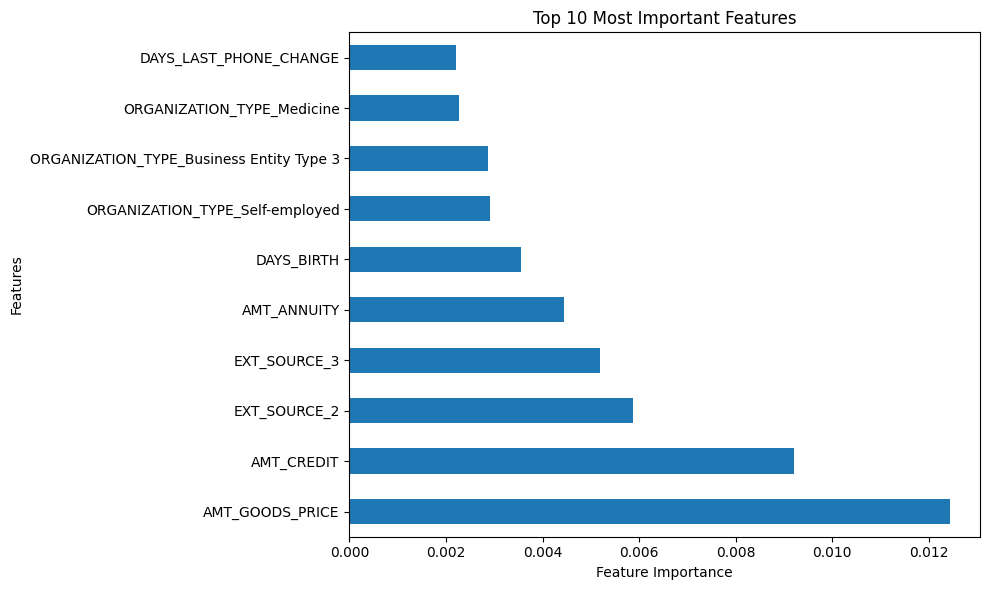

In [17]:
# Visualize feature importances
plt.figure(figsize=(10, 6))
top_features.plot(kind='barh')
plt.title('Top 10 Most Important Features')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

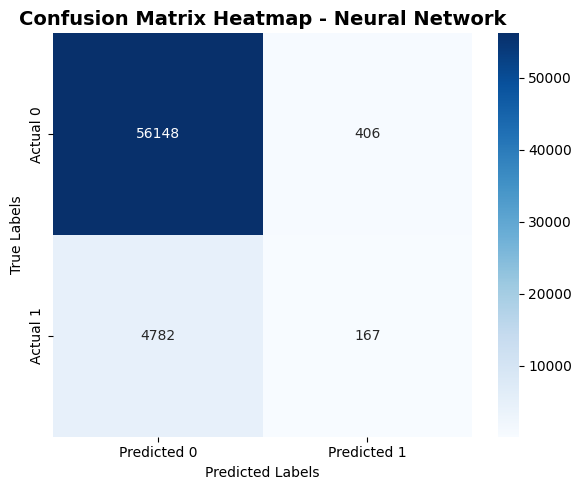

Confusion Matrix Analysis:
True Negatives: 56148
False Positives: 406
False Negatives: 4782
True Positives: 167


In [18]:
# Visualization: Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=[f'Predicted {i}' for i in range(cm.shape[1])],
            yticklabels=[f'Actual {i}' for i in range(cm.shape[0])])
plt.title('Confusion Matrix Heatmap - Neural Network', fontsize=14, fontweight='bold')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.tight_layout()
plt.show()

print(f"Confusion Matrix Analysis:")
print(f"True Negatives: {cm[0,0] if cm.shape[0] > 1 else 'N/A'}")
print(f"False Positives: {cm[0,1] if cm.shape[0] > 1 and cm.shape[1] > 1 else 'N/A'}")
print(f"False Negatives: {cm[1,0] if cm.shape[0] > 1 and cm.shape[1] > 1 else 'N/A'}")
print(f"True Positives: {cm[1,1] if cm.shape[0] > 1 and cm.shape[1] > 1 else 'N/A'}")

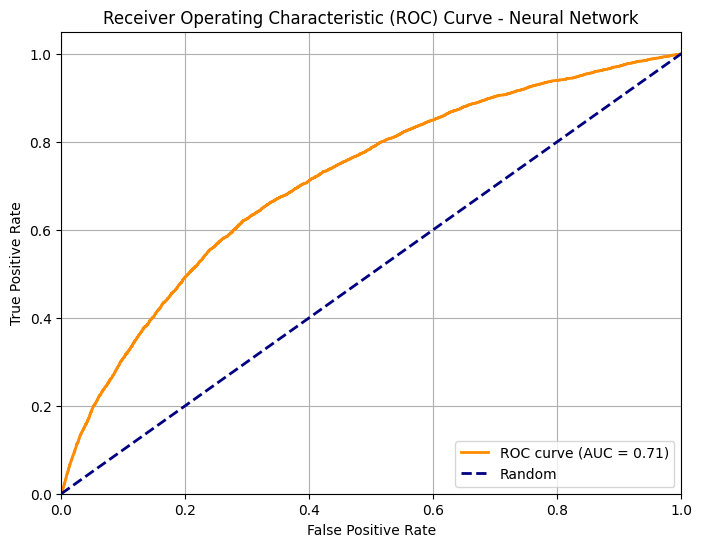

In [19]:
# ROC Curve visualization using main model
# (roc_curve and auc already imported earlier)

# Use validation split variables (X_val, y_val) defined previously
y_pred_proba_viz = model.predict_proba(X_val)[:, 1]
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba_viz)
roc_auc_viz = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_viz:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Neural Network')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

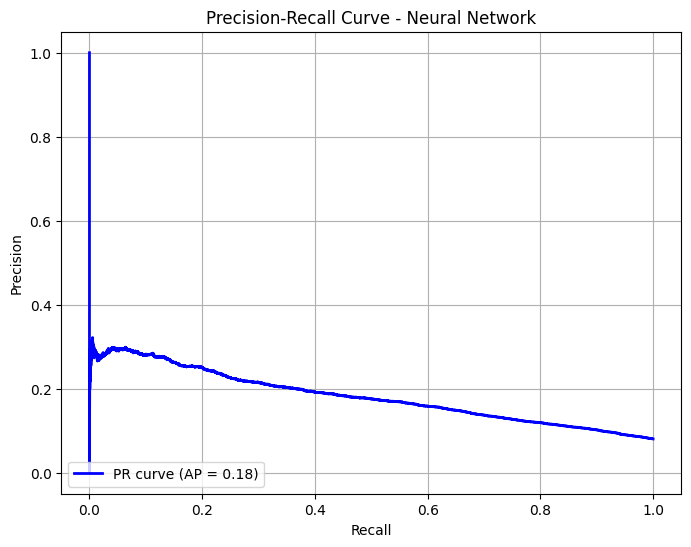

In [20]:
# Precision-Recall Curve using validation set (y_val) and probabilities (y_pred_proba_viz)

precision_viz, recall_viz, _ = precision_recall_curve(y_val, y_pred_proba_viz)
avg_precision_viz = average_precision_score(y_val, y_pred_proba_viz)

plt.figure(figsize=(8, 6))
plt.plot(recall_viz, precision_viz, color='blue', lw=2, label=f'PR curve (AP = {avg_precision_viz:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Neural Network')
plt.legend(loc="lower left")
plt.grid(True)
plt.show()

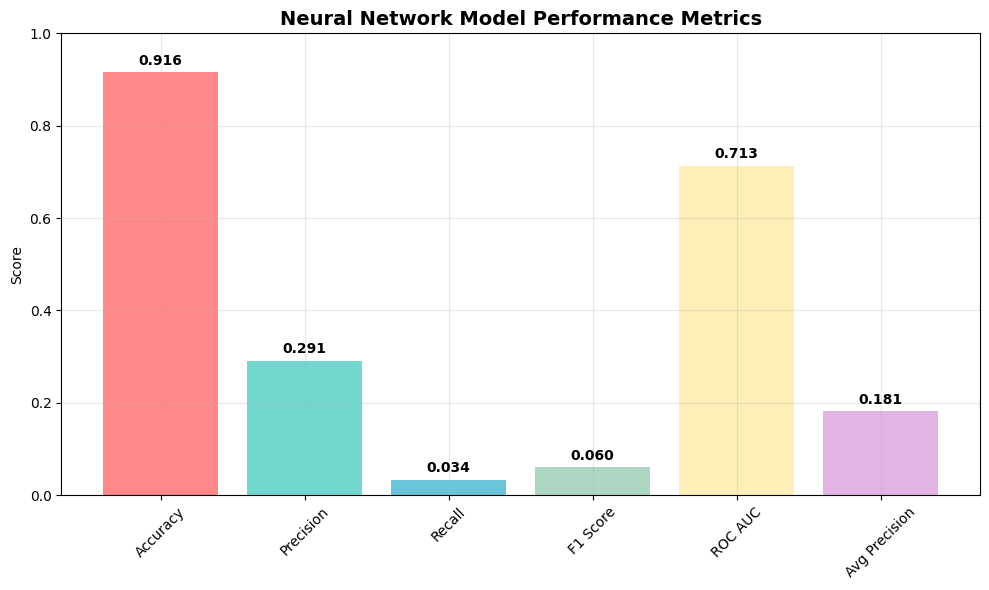

Performance Metrics Summary:
Accuracy: 0.9156
Precision: 0.2914
Recall: 0.0337
F1 Score: 0.0605
ROC AUC: 0.7125
Avg Precision: 0.1814


In [21]:
# Visualization: Performance Metrics Bar Chart
metrics_dict = {
    "Accuracy": acc,
    "Precision": prec,
    "Recall": rec,
    "F1 Score": f1,
    "ROC AUC": roc_auc,
    "Avg Precision": ap
}

plt.figure(figsize=(10, 6))
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7', '#DDA0DD']
bars = plt.bar(metrics_dict.keys(), metrics_dict.values(), color=colors, alpha=0.8)
plt.title('Neural Network Model Performance Metrics', fontsize=14, fontweight='bold')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.xticks(rotation=45)

# Add value labels on bars
for bar, value in zip(bars, metrics_dict.values()):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{value:.3f}', ha='center', va='bottom', fontweight='bold')

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("Performance Metrics Summary:")
for metric, value in metrics_dict.items():
    print(f"{metric}: {value:.4f}")

In [22]:
# SHAP Analysis for Model Explainability (for MLPClassifier)
# Install and import shap (needed because 'shap' was not previously imported -> NameError)
%pip install shap
import shap

# Reconstruct DataFrame versions of train/validation sets (original X has column names)
# X (encoded feature DataFrame) already exists from earlier preprocessing
if isinstance(X_train, np.ndarray):
    X_train_df = pd.DataFrame(X_train, columns=X.columns)
else:
    X_train_df = X_train.copy()

if isinstance(X_val, np.ndarray):
    X_val_df = pd.DataFrame(X_val, columns=X.columns)
else:
    X_val_df = X_val.copy()

# Use validation split as "test" set for explanations
# Sample a small subset for performance (KernelExplainer is expensive)
sample_size = min(100, X_val_df.shape[0])
X_test_sample = X_val_df.iloc[:sample_size]
y_test_sample = y_val.iloc[:sample_size]

print(f"Using {sample_size} validation samples for SHAP KernelExplainer.")

# Define a prediction function returning probability of positive class
def model_predict(data):
    # data will arrive as numpy array from SHAP; ensure correct shape
    return model.predict_proba(data)[:, 1]

# Background (reference) dataset: random sample from training data
background_size = min(100, X_train_df.shape[0])
background = X_train_df.sample(background_size, random_state=42)
print(f"Background sample size for SHAP: {background.shape[0]}")

# KernelExplainer for arbitrary (non-tree) models like MLP
explainer = shap.KernelExplainer(model_predict, background, link="logit")

print("Computing SHAP values (this may take a while)...")
# Limit nsamples for speed; adjust higher for more precise results
shap_values_to_use = explainer.shap_values(X_test_sample, nsamples=100)

base_value = explainer.expected_value
print("SHAP values computed.")
print(f"SHAP matrix shape: {np.array(shap_values_to_use).shape}")
print(f"Base value (expected model output): {base_value:.4f}")

# Mean absolute SHAP importance
mean_shap_importance = np.abs(shap_values_to_use).mean(axis=0)

print(f"Mean SHAP importance vector length: {len(mean_shap_importance)}")
print(f"Number of features: {X_test_sample.shape[1]}")
if len(mean_shap_importance) == X_test_sample.shape[1]:
    print("✓ Shapes match (features vs SHAP importance).")
else:
    print("⚠ Shape mismatch between SHAP importance and features!")

# Assemble importance DataFrame
feature_importance_shap = (
    pd.DataFrame({
        'feature': X_test_sample.columns,
        'shap_importance': mean_shap_importance
    })
    .sort_values('shap_importance', ascending=False)
)

print("\nTop 10 Most Important Features (SHAP-based):")
print(feature_importance_shap.head(10))

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Using 100 validation samples for SHAP KernelExplainer.
Background sample size for SHAP: 100
Computing SHAP values (this may take a while)...


  0%|          | 0/100 [00:00<?, ?it/s]

C:\Users\fabrizio natali\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_least_angle.py:723: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 6 iterations, i.e. alpha=1.304e-02, with an active set of 6 regressors, and the smallest cholesky pivot element being 4.215e-08. Reduce max_iter or increase eps parameters.
  warnings.warn(


SHAP values computed.
SHAP matrix shape: (100, 166)
Base value (expected model output): -2.3943
Mean SHAP importance vector length: 166
Number of features: 166
✓ Shapes match (features vs SHAP importance).

Top 10 Most Important Features (SHAP-based):
                                      feature  shap_importance
5                             AMT_GOODS_PRICE         0.412538
3                                  AMT_CREDIT         0.332445
113  ORGANIZATION_TYPE_Business Entity Type 3         0.263123
28                               EXT_SOURCE_3         0.243670
27                               EXT_SOURCE_2         0.128764
150           ORGANIZATION_TYPE_Self-employed         0.084144
79                 NAME_INCOME_TYPE_Pensioner         0.070635
165                     ORGANIZATION_TYPE_XNA         0.067447
8                               DAYS_EMPLOYED         0.064300
136            ORGANIZATION_TYPE_Kindergarten         0.057293


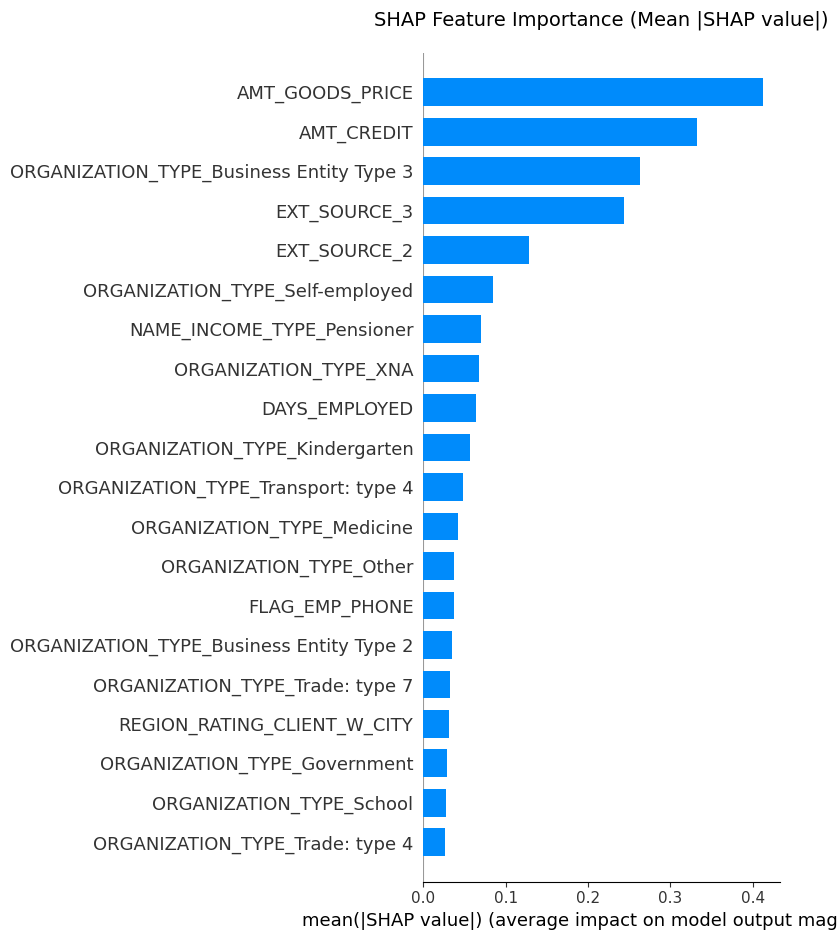

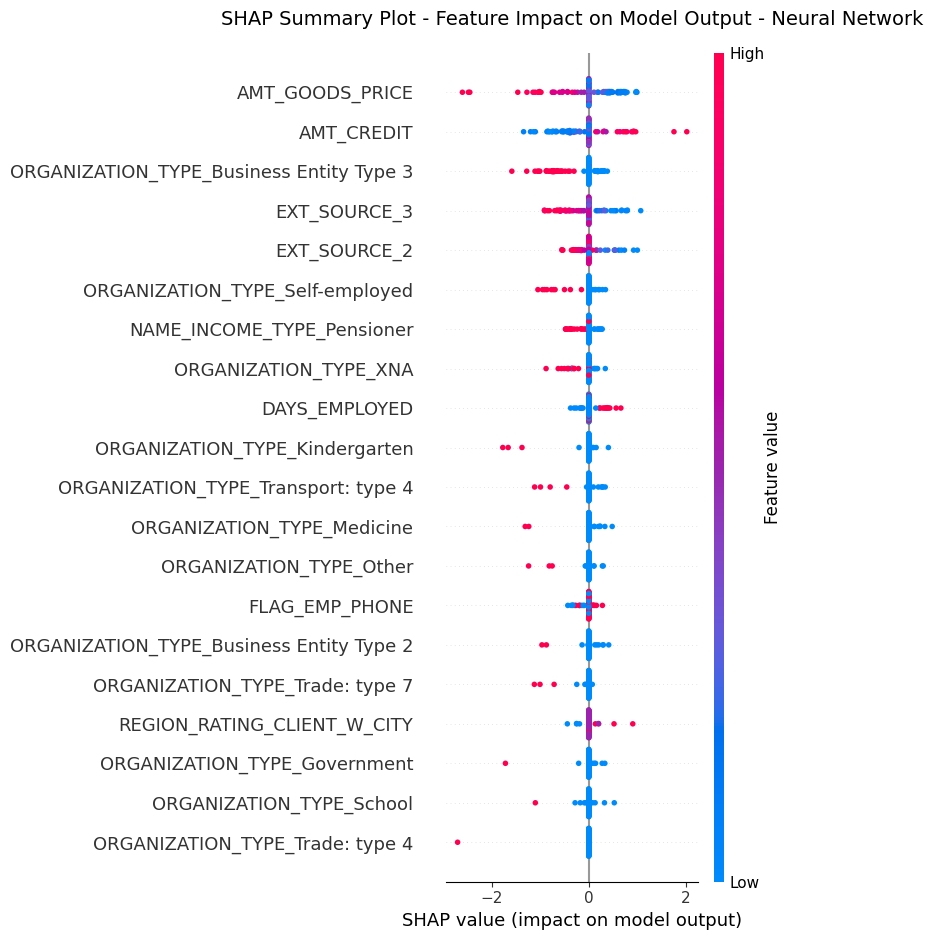

In [23]:
# SHAP Summary Plot - Shows feature importance and impact direction
plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values_to_use, X_test_sample, plot_type="bar", show=False)
plt.title('SHAP Feature Importance (Mean |SHAP value|)', fontsize=14, pad=20)
plt.tight_layout()
plt.show()

# SHAP Summary Plot with feature values
plt.figure(figsize=(12, 10))
shap.summary_plot(shap_values_to_use, X_test_sample, show=False)
plt.title('SHAP Summary Plot - Feature Impact on Model Output - Neural Network', fontsize=14, pad=20)
plt.tight_layout()
plt.show()

C:\Users\fabrizio natali\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(



=== SAMPLE 1 (Index 0) ===
Actual label: 0
Predicted probability (class 1): 0.3619


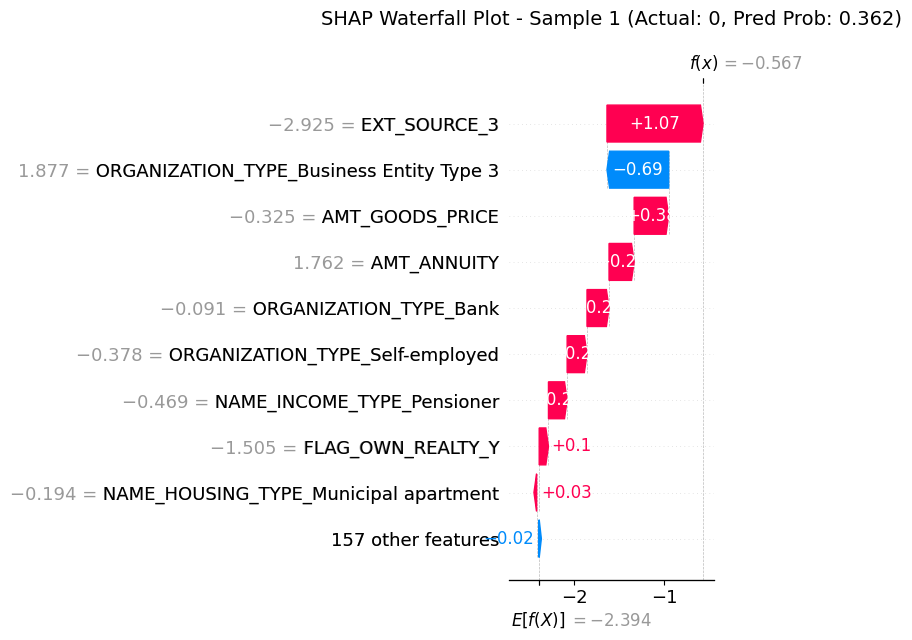

C:\Users\fabrizio natali\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(



=== SAMPLE 2 (Index 1) ===
Actual label: 0
Predicted probability (class 1): 0.0345


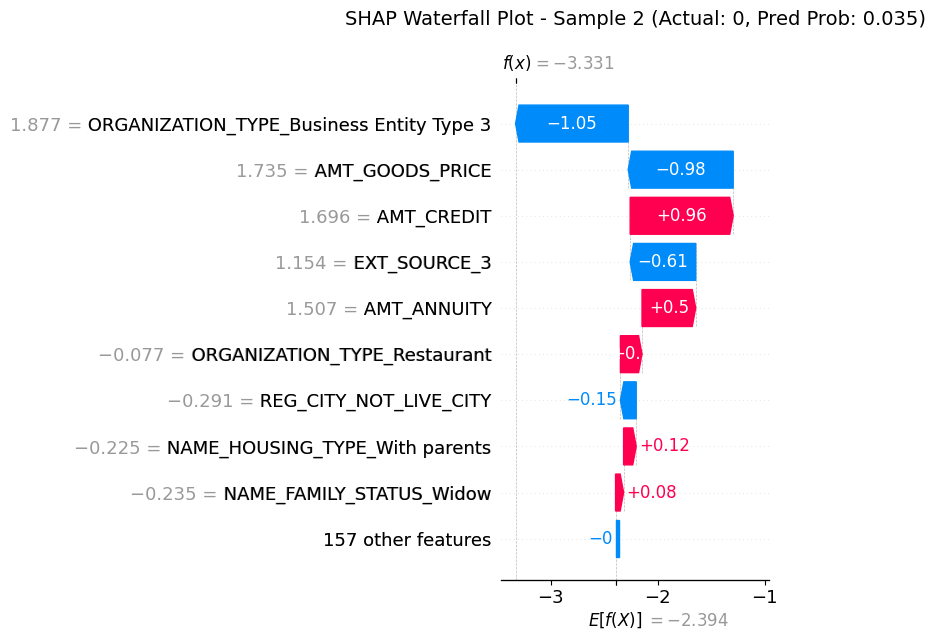

C:\Users\fabrizio natali\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(



=== SAMPLE 3 (Index 2) ===
Actual label: 0
Predicted probability (class 1): 0.0947


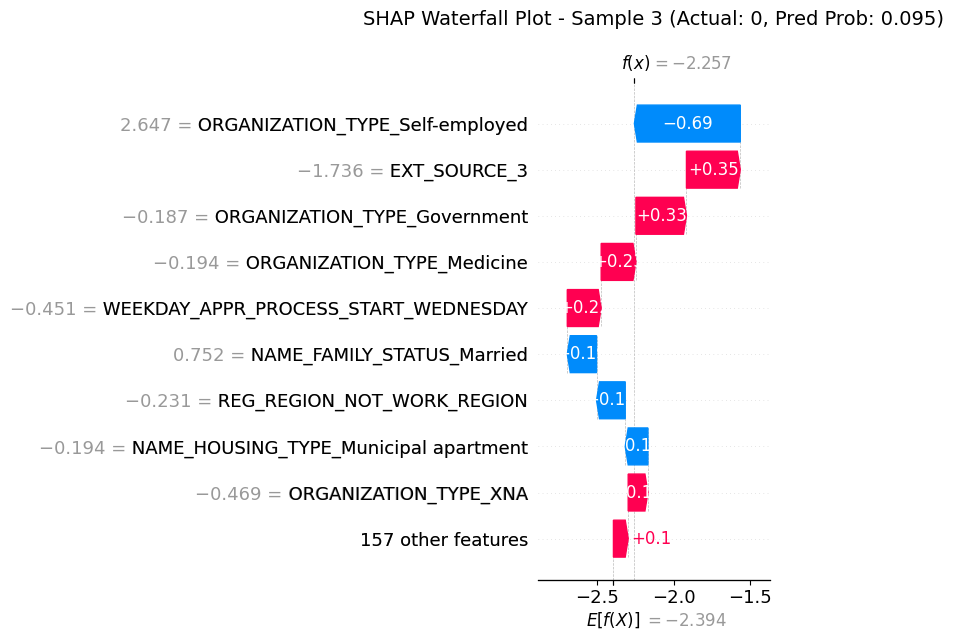

In [24]:
# SHAP Waterfall Plot - Explain individual predictions
# Select a few interesting samples to explain
sample_indices = [0, 1, 2]  # First three samples

for i, idx in enumerate(sample_indices):
    actual_label = y_test_sample.iloc[idx]
    predicted_prob = model.predict_proba(X_test_sample.iloc[[idx]])[0, 1]
    
    print(f"\n=== SAMPLE {i+1} (Index {idx}) ===")
    print(f"Actual label: {actual_label}")
    print(f"Predicted probability (class 1): {predicted_prob:.4f}")
    
    # Create waterfall plot
    plt.figure(figsize=(12, 8))
    shap.waterfall_plot(
        shap.Explanation(
            values=shap_values_to_use[idx], 
            base_values=base_value, 
            data=X_test_sample.iloc[idx],
            feature_names=X_test_sample.columns.tolist()
        ),
        show=False
    )
    plt.title(f'SHAP Waterfall Plot - Sample {i+1} (Actual: {actual_label}, Pred Prob: {predicted_prob:.3f})', 
              fontsize=14, pad=20)
    plt.tight_layout()
    plt.show()